   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

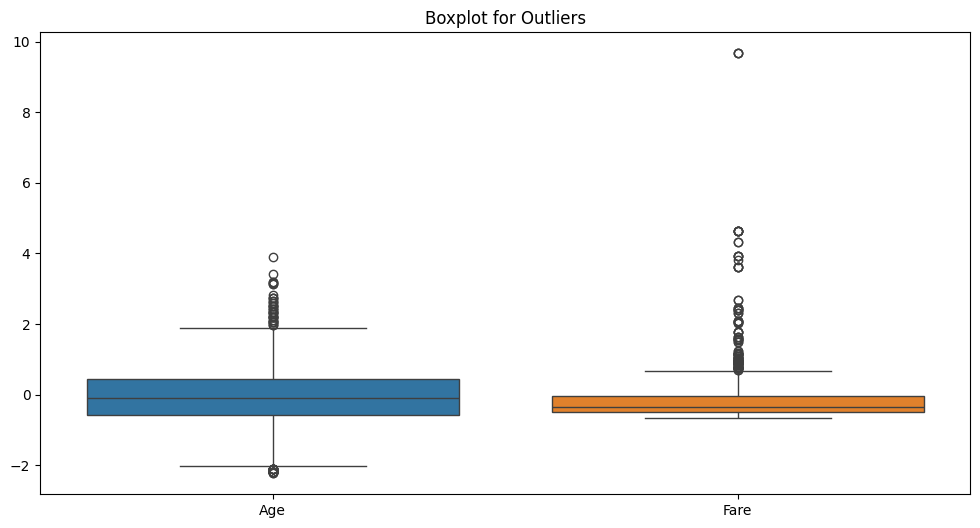

In [3]:
############### SECTION-1 ( Import required Libraries ) #####################

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

############### SECTION-2 ( Load Dataset )#####################

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

############### SECTION-3 ( Knowing the details of the Dataset )#####################

print(df.head())
print(df.info())
print(df.isnull().sum())

############### SECTION-4 ( Handle the missing values ) #####################

df['Age'].fillna(df['Age'].median(),inplace =True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

############### SECTION-5 ( Encode Categorical columns )#####################

label = LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])
df['Embarked']= label.fit_transform(df['Embarked'])

############### SECTION-6 ( Feature scaling )#####################

scaler= StandardScaler()
df[['Age','Fare']]= scaler.fit_transform(df[['Age','Fare']])

############### SECTION-7 (Detecting & Visualizing the outliers ) #####################

plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Age','Fare']])
plt.title("Boxplot for Outliers")
plt.show()

############### SECTION-8 ( We remove the detected outliers )#####################

Q1= df[['Age','Fare']].quantile(0.25)
Q3= df[['Age','Fare']].quantile(0.75)
IQR = Q3-Q1

df = df[
    (df['Age'] >= Q1['Age'] - 1.5 * IQR['Age']) & (df['Age'] <= Q3['Age'] + 1.5 * IQR['Age']) &
    (df['Fare'] >= Q1['Fare'] - 1.5 * IQR['Fare']) & (df['Fare'] <= Q3['Fare'] + 1.5 * IQR['Fare'])
];

############### SECTION-9 ( Cleaned dataset) #####################

df.to_csv('cleaned_titanic.csv', index=False)